In [1]:
# Employee salary prediction

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

In [4]:
pip install pandas scikit-learn


In [5]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/adult 3.csv")


In [6]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
data.shape

(48842, 15)

In [8]:
data.head(20)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [9]:
data.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [10]:
data.tail(7)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48835,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
48836,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [11]:
data.isna().head(20)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
data.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [13]:
print(data.occupation.value_counts())
# data.occupation.value_counts();

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


In [14]:
print(data.gender.value_counts())

gender
Male      32650
Female    16192
Name: count, dtype: int64


In [15]:
print(data.education.value_counts())

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64


In [16]:
print(data['marital-status'].value_counts())

 #because here - is used with name

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64


In [17]:
print(data.workclass.value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


In [18]:
print(data.occupation.replace({'?':'others'}))
# not impact on original data

0        Machine-op-inspct
1          Farming-fishing
2          Protective-serv
3        Machine-op-inspct
4                   others
               ...        
48837         Tech-support
48838    Machine-op-inspct
48839         Adm-clerical
48840         Adm-clerical
48841      Exec-managerial
Name: occupation, Length: 48842, dtype: object


In [19]:
data.occupation.replace({'?':'others'},inplace=True)
#impact on original data

/tmp/ipython-input-19-3547106457.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.occupation.replace({'?':'others'},inplace=True)


In [20]:
print(data.occupation.value_counts())
#data.occupation.value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
others               2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


In [21]:
# print(data.head(20))
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,others,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [22]:
print(data.workclass.value_counts());

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


In [23]:
data.workclass.replace({'?':'Notlisted'},inplace=True)

/tmp/ipython-input-23-3515431001.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.workclass.replace({'?':'Notlisted'},inplace=True)


In [24]:
print(data['workclass'].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Notlisted            2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


In [25]:
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Notlisted,103497,Some-college,10,Never-married,others,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,Notlisted,227026,HS-grad,9,Never-married,others,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [26]:

# filter the workclass row
#remove the tag from column

data = data[data['workclass']!='Without-pay']
data = data[data['workclass']!='Never-worked']

In [27]:
print(data['workclass'].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Notlisted            2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Name: count, dtype: int64


In [28]:
data.shape

(48811, 15)

In [29]:
print(data.education.value_counts())

education
HS-grad         15768
Some-college    10873
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1809
Assoc-acdm       1599
10th             1387
7th-8th           952
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64


In [30]:
data = data[data['education']!='5th-6th']
data = data[data['education']!='7th-8th']
data = data[data['education']!='1st-4th']
data = data[data['education']!='Preschool']
data = data[data['education']!='9th']
data = data[data['education']!='10th']
data = data[data['education']!='11th']
data = data[data['education']!='12th']

data = data[data['education']!='HS-grad']
data = data[data['education']!='Some-college']
data = data[data['education']!='Assoc-acdm']
data = data[data['education']!='Assoc-voc']




In [31]:
print(data.education.value_counts())

education
Bachelors      8025
Masters        2657
Prof-school     834
Doctorate       594
Name: count, dtype: int64


In [32]:
print(data.education.value_counts())

education
Bachelors      8025
Masters        2657
Prof-school     834
Doctorate       594
Name: count, dtype: int64


In [33]:
data.shape

(12110, 15)

In [34]:
# data.drop(columns=['education'], inplace=True)
# print(data)

In [35]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
11,36,Federal-gov,212465,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K
15,43,Private,346189,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K
19,40,Private,85019,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,45,?,>50K
20,34,Private,107914,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,47,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48820,71,Notlisted,287372,Doctorate,16,Married-civ-spouse,others,Husband,White,Male,0,0,10,United-States,>50K
48825,31,Private,199655,Masters,14,Divorced,Other-service,Not-in-family,Other,Female,0,0,30,United-States,<=50K
48829,65,Self-emp-not-inc,99359,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,1086,0,60,United-States,<=50K
48834,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K


In [36]:
print(data['native-country'].value_counts());

native-country
United-States                 10735
?                               346
Philippines                     130
India                           105
Germany                          69
China                            69
Canada                           63
England                          56
Mexico                           55
Taiwan                           53
Japan                            44
South                            43
Cuba                             36
Iran                             33
Italy                            23
Poland                           22
France                           21
Vietnam                          19
Puerto-Rico                      18
Jamaica                          16
El-Salvador                      13
Hong                             13
Columbia                         12
Greece                           11
Thailand                         10
Peru                             10
Ireland                           9
Dominican-Rep

In [37]:
data = data[data['native-country']!='?']

In [38]:
print(data['native-country'].value_counts());

native-country
United-States                 10735
Philippines                     130
India                           105
Germany                          69
China                            69
Canada                           63
England                          56
Mexico                           55
Taiwan                           53
Japan                            44
South                            43
Cuba                             36
Iran                             33
Italy                            23
Poland                           22
France                           21
Vietnam                          19
Puerto-Rico                      18
Jamaica                          16
El-Salvador                      13
Hong                             13
Columbia                         12
Greece                           11
Thailand                         10
Peru                             10
Ireland                           9
Dominican-Republic                9
Hungary      

In [39]:
#filter age data
data['age'].describe()

,age
count,11764.000000
mean,40.874532
std,12.069089
min,18.000000
25%,31.000000
50%,40.000000
75%,48.000000
max,90.000000


In [40]:
# Keep only rows where age ≤ 50
# data = data[data['age'] <= 50]

In [41]:
data = data.drop(data[data['age'] > 50].index)  #both are same

In [42]:
data = data.drop(data[data['age'] < 17].index)  #both are same

In [43]:
#filter age data
data['age'].describe()

,age
count,9394.000000
mean,36.267618
std,7.987289
min,18.000000
25%,29.000000
50%,36.000000
75%,43.000000
max,50.000000


In [44]:
#now change the varibal type
stats = data['age'].describe()
int_stats = stats.astype('int64')
print(int_stats)

count    9394
mean       36
std         7
min        18
25%        29
50%        36
75%        43
max        50
Name: age, dtype: int64


In [45]:
# in original dataset
data['age'] = data['age'].astype('int64')

In [46]:
data['age'].describe()

,age
count,9394.000000
mean,36.267618
std,7.987289
min,18.000000
25%,29.000000
50%,36.000000
75%,43.000000
max,50.000000


In [47]:
data.age.value_counts()

,count
age,
42,371
41,368
43,368
44,367
45,363
46,363
39,357
40,356
38,354


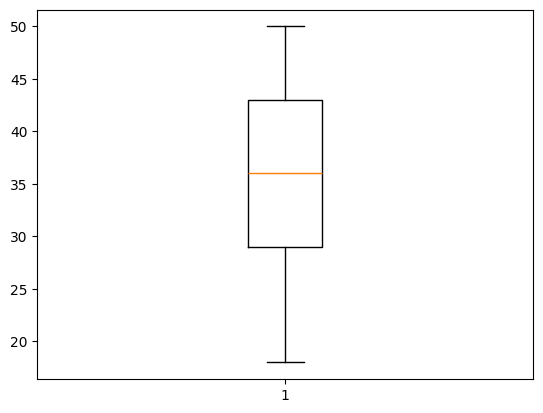

In [48]:
#use for map plot

import matplotlib.pyplot as plt
plt.boxplot(data['age'])
plt.show()

In [49]:
data.tail(20)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48739,36,Private,237943,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1977,45,United-States,>50K
48742,24,Private,284317,Bachelors,13,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,32,United-States,<=50K
48745,45,Self-emp-inc,173664,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
48747,37,Private,121521,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024,0,45,United-States,>50K
48751,50,Private,485710,Doctorate,16,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States,<=50K
48753,34,Private,30673,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,55,United-States,<=50K
48754,41,Federal-gov,160467,Masters,14,Divorced,Prof-specialty,Unmarried,White,Female,1506,0,40,United-States,<=50K
48761,41,Private,201495,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
48783,35,Local-gov,79649,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48785,50,Private,208630,Masters,14,Divorced,Sales,Not-in-family,White,Female,0,0,50,United-States,>50K


In [50]:
#data =data[(data['age']<=75 & (data['age']>=17))]

In [51]:
data.shape

(9394, 15)

In [52]:
data.head(50)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
11,36,Federal-gov,212465,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K
15,43,Private,346189,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K
20,34,Private,107914,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,47,United-States,>50K
23,25,Private,220931,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,43,Peru,<=50K
24,25,Private,205947,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
32,24,Self-emp-not-inc,188274,Bachelors,13,Never-married,Sales,Not-in-family,White,Male,0,0,50,United-States,<=50K
36,36,Local-gov,403681,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K
57,34,Local-gov,382078,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,3103,0,50,United-States,>50K
60,30,Private,101135,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,50,United-States,<=50K
62,26,Private,31208,Masters,14,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,<=50K


In [53]:
data = data.reset_index(drop=True)  # Drops old indexes, adds new 0-based ones

In [54]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,36,Federal-gov,212465,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K
1,43,Private,346189,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K
2,34,Private,107914,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,47,United-States,>50K
3,25,Private,220931,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,43,Peru,<=50K
4,25,Private,205947,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9389,34,Private,204461,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K
9390,34,Private,160216,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,55,United-States,>50K
9391,38,Private,139180,Bachelors,13,Divorced,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,>50K
9392,31,Private,199655,Masters,14,Divorced,Other-service,Not-in-family,Other,Female,0,0,30,United-States,<=50K


In [55]:
# go down

In [56]:
data.to_csv('export_employee.csv', index=False)

data.shape

(9394, 15)

In [57]:
data['income']

,income
0,<=50K
1,>50K
2,>50K
3,<=50K
4,<=50K
...,...
9389,>50K
9390,>50K
9391,>50K
9392,<=50K


In [58]:
data.isna()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9389,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9390,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9391,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9392,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [59]:
data = data.dropna()

In [60]:
data.shape

(9394, 15)

In [61]:
print(data.isna().sum())

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


can also do this inthis format


In [62]:
#lable encodeing
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
categorical_columns = ['workclass','education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
# data['workclass'] = encoder.fit_transform(data['workclass'])
for col in categorical_columns:
    data[col] = encoder.fit_transform(data[col])


In [63]:
# Features and Target
X = data.drop('income', axis=1)
y = data['income']

 re create the preprocessing encoding---------------------------------------------------------------------------

In [64]:
# LabelEncoder

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['workclass'] = encoder.fit_transform(data['workclass'])
data['education'] = encoder.fit_transform(data['education'])
data['marital-status'] = encoder.fit_transform(data['marital-status'])
data['occupation'] = encoder.fit_transform(data['occupation'])
data['relationship'] = encoder.fit_transform(data['relationship'])
data['race'] = encoder.fit_transform(data['race'])
data['gender'] = encoder.fit_transform(data['gender'])
data['native-country'] = encoder.fit_transform(data['native-country'])


In [65]:
X = data.drop('income', axis=1)
y = data['income']

In [66]:
y

,income
0,<=50K
1,>50K
2,>50K
3,<=50K
4,<=50K
...,...
9389,>50K
9390,>50K
9391,>50K
9392,<=50K


In [67]:
X

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,36,0,212465,0,13,2,0,0,4,1,0,0,40,37
1,43,3,346189,2,14,2,3,0,4,1,0,0,50,37
2,34,3,107914,0,13,2,12,0,4,1,0,0,47,37
3,25,3,220931,0,13,4,9,1,4,1,0,0,43,27
4,25,3,205947,0,13,2,9,0,4,1,0,0,40,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9389,34,3,204461,1,16,2,9,0,4,1,0,0,60,37
9390,34,3,160216,0,13,4,3,1,4,0,0,0,55,37
9391,38,3,139180,0,13,0,9,4,2,0,15020,0,45,37
9392,31,3,199655,2,14,0,7,1,3,0,0,0,30,37


In [68]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.5625    , 0.        , 0.16306527, ..., 0.        , 0.39795918,
        0.94871795],
       [0.78125   , 0.5       , 0.27342546, ..., 0.        , 0.5       ,
        0.94871795],
       [0.5       , 0.5       , 0.07678106, ..., 0.        , 0.46938776,
        0.94871795],
       ...,
       [0.625     , 0.5       , 0.10258437, ..., 0.        , 0.44897959,
        0.94871795],
       [0.40625   , 0.5       , 0.15249339, ..., 0.        , 0.29591837,
        0.94871795],
       [0.4375    , 0.5       , 0.0835682 , ..., 0.        , 0.10204082,
        0.87179487]])

train and testing the model

In [69]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23, stratify=y)

model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [70]:
X_train

array([[0.46875   , 0.5       , 0.20605345, ..., 0.        , 0.44897959,
        0.94871795],
       [0.5625    , 0.5       , 0.16070826, ..., 0.        , 0.37755102,
        0.94871795],
       [0.5       , 0.16666667, 0.0846031 , ..., 0.        , 0.39795918,
        0.94871795],
       ...,
       [0.4375    , 0.5       , 0.17523737, ..., 0.        , 0.39795918,
        0.15384615],
       [0.75      , 1.        , 0.0780586 , ..., 0.        , 0.39795918,
        0.94871795],
       [0.1875    , 0.5       , 0.18306271, ..., 0.        , 0.5       ,
        0.87179487]])

---------------using knn  algorithmns-------find accuracy of model---------------------------------------------

In [71]:
#machin learning algorithm
#Knn neighboursclassifier
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)
#input and output training data
predict = model.predict(X_test)


In [72]:
predict

array(['>50K', '<=50K', '>50K', ..., '>50K', '<=50K', '>50K'],
      dtype=object)

In [73]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predict)

0.7551889302820649

using neural network  improve accuracy  

```
# This is formatted as code
```



In [74]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predict)

array([[778, 248],
       [212, 641]])

In [75]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1, max_iter = 2000)
clf.fit(X_train, y_train)
predict2 = clf.predict(X_test)

predict2



array(['>50K', '<=50K', '>50K', ..., '>50K', '<=50K', '>50K'], dtype='<U5')

In [76]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predict2)

0.8014901543374136

we can use also other alsorithms for improving accuracy

here we export the model all 3 step at here -----------------------------------
 here we use random forest


In [77]:
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model = RandomForestClassifier()
# model.fit(X_train, y_train)

# # Evaluate
# y_pred = model.predict(X_test)
# print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8036189462480042


Now save the Model

save the data which you have filtered

In [78]:
data.to_csv('export_employee.csv', index=False)

data.shape

(9394, 15)

In [104]:
import joblib

# Save the trained model
joblib.dump(model, 'salary_model.joblib')


In [80]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,36,0,212465,0,13,2,0,0,4,1,0,0,40,37,<=50K
1,43,3,346189,2,14,2,3,0,4,1,0,0,50,37,>50K
2,34,3,107914,0,13,2,12,0,4,1,0,0,47,37,>50K
3,25,3,220931,0,13,4,9,1,4,1,0,0,43,27,<=50K
4,25,3,205947,0,13,2,9,0,4,1,0,0,40,37,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9389,34,3,204461,1,16,2,9,0,4,1,0,0,60,37,>50K
9390,34,3,160216,0,13,4,3,1,4,0,0,0,55,37,>50K
9391,38,3,139180,0,13,0,9,4,2,0,15020,0,45,37,>50K
9392,31,3,199655,2,14,0,7,1,3,0,0,0,30,37,<=50K


In [81]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=data)

https://docs.google.com/spreadsheets/d/1nU0NFUn6HM4UErAvecSlC2-2kxFXnrjVdDCo7BAuR9M/edit#gid=0


now import the joblib to predict the data using  module

In [82]:
!pip install gradio joblib


now import joblib library

Create a Prediction Function